In [1]:
from time import time
start = time()

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Confidence Intervals (CI) and Bootstrapping

A confidence interval is a range of values representing how confidence we are about some parameter (e.g mean, mode, median, etc) of the population based only in a sample.

Usually when working with data we only have a sample of the population rather than the whole population. However, we are able to estimate a range of values of possible values of a parameter (generally the mean o $\mu$) of the population if we have a significant sample data. Thus, the central limit theorem states that the distribution of sample means approximates a normal distribution and, as you already may know, we are able to retrieve aprox. 95% of our data covering two (to be more accurate is 1.96) standard deviation ($\sigma$) to the right and left from the mean.

Getting the means of random samples of the population and retrieving the 95% of that distribution (normal distribution because the central limit theorem) give us the confidence interval of the true mean population with a confidence of 95% based on the sample, the larger the data sample size, the better the confidence interval obtained. We can also obtain other confidence intervals, for example, a confidence interval of 99% taking aprox 3$\sigma$ from the rigth and left of the distribution of the means.

If we have multiples samples, the confidence interval can be computed getting the means of the samples and then retrieving the limit inferior of the real values of the parameter as the percentile number 0.025 and the superior with aprox 0.975, the range of values between those percentiles encompasses the 95% of all the data but, if we have only one sample, we can calculate the standard error (SE), which is the standard deviation of the means of multiples samples of the population, and multiply it for 1.96 ($\sigma$)

$$
limit\ inferior = \mu - SE * 1.96
$$

$$
limit\ superior = \mu + SE * 1.96
$$

The general representation to calculate the CI is also shown as:

$$
CI = \mu\ \pm \ z * \frac{s}{\sqrt{n}}\ \ \ \ \ \ \ \ z=confidence\ level\ value;\ s=standard\ deviation\ of\ the\ sample;\ n=sample\ size
$$

Calculating the CI as shown above assumes your data is normal distributed, which is not always the case. In this situation, we also take advantage of a powerful method called bootstrapping. 

Bootstrapping basically does a resampling of your sample calculating virtually any parameter of interest to us wich tries to describe the population parameter. This resampling is computed taking a sample of your sample of the same size but allowing repetition, for each sampled sample the parameter is calculated and, from here, several methods have been determined to calculate the CI: empirical bootstapping (here also known as basic or reverse), normal, percentile, etc.

Thus, for example, normal bootstrapping uses the definition of CI for normal data (see above) because the parameters obtained from the sampled samples follow a normal distribution, substituting the $mu$ for the $mu^*$ or mean of your sampled samples or the parameter of your interest and the $SE$ for the $SE^*$ again, of your sampled samples.

On the other hand, empirical defines the CI for the mean as:

$$
CI = (2\overline{x} - x^*_{1 - \frac{\alpha}{2}},\ 2\overline{x} - x^*_{\frac{\alpha}{2}})
$$

$$
where\ \overline{x}\ is\ the\ mean\ of\ the\ original\ data(the\ sample)
$$

$$
x^*\ is\ the\ mean\ of\ the\ sampled\ samples\ found\ in\ the\ percentiles\\
$$

$$
1\ -\ \frac{\alpha}{2}\ and\ \frac{\alpha}{2}\ (these\ are\ the\ percentiles)
$$

In [4]:
# Lets create random normal data to ilustrate the interval confidence
norm_pop = np.random.normal(10, 1, 100000)

print(f"True mean population: {norm_pop.mean()}")

True mean population: 10.0041074311075


In [5]:
# Now lets get the confidence intervals with a confidence of 95% based on only a random sample

def ShowCI95(population:"array-like", sample_size:int):
    
    '''
    Show on screen the 95% confidence interval of the mean
    
    This functions print on screen the range of values of the 95% confidence intervals based on a 
    sample of the population provided
    
    Parameters
    ----------
    
    population: array-like
        array-like representing the population where a sample of size sample_size will be taken
        
    sample_size: integer, int
        size of the sample
            
    
    Examples
    ----------
    
    >>>import numpy as np
    >>>import pandas as pd
    >>>data = np.random.normal(0,1,10000)
    >>>ShowCI95(data, 1000)
    Sample size: 1000
    Sample mean: -0.006450809541726166
    True mean population is between -0.06841125689868024 and 0.055509637815227914 with a confidence of 95%
    The sample mean has an aprox error of -0.006 +/- 0.062
    
    
    '''

    norm_sam = np.random.choice(population, sample_size)
    
    # sem() is a pandas function to get the SE
    error = pd.Series(norm_sam).sem() * 1.96
    mu = norm_sam.mean()
    
    l_inf = mu - error
    l_sup = mu + error

    print(f"Sample size: {norm_sam.shape[0]}")
    print(f"Sample mean: {norm_sam.mean()}")
    print(f"True mean population is between {l_inf} and {l_sup} with a confidence of 95%")
    print(f"The sample mean has an aprox error of {round(mu, 3)} +/- {round(error, 3)}")
    
ShowCI95(norm_pop, 5000)

Sample size: 5000
Sample mean: 10.011165870635253
True mean population is between 9.983438728385664 and 10.038893012884841 with a confidence of 95%
The sample mean has an aprox error of 10.011 +/- 0.028


In [6]:
# The error increases as the sample data size decreases

for size in [10000,5000,2500,1000,500,250,125]:
    ShowCI95(norm_pop, size)
    print("")


Sample size: 10000
Sample mean: 10.008644813808651
True mean population is between 9.98894586519296 and 10.028343762424342 with a confidence of 95%
The sample mean has an aprox error of 10.009 +/- 0.02

Sample size: 5000
Sample mean: 9.997187128361137
True mean population is between 9.969517291846039 and 10.024856964876236 with a confidence of 95%
The sample mean has an aprox error of 9.997 +/- 0.028

Sample size: 2500
Sample mean: 9.990167249936663
True mean population is between 9.950506601391188 and 10.029827898482138 with a confidence of 95%
The sample mean has an aprox error of 9.99 +/- 0.04

Sample size: 1000
Sample mean: 10.005323527087137
True mean population is between 9.94368017898981 and 10.066966875184464 with a confidence of 95%
The sample mean has an aprox error of 10.005 +/- 0.062

Sample size: 500
Sample mean: 9.954196385337408
True mean population is between 9.865063567195559 and 10.043329203479257 with a confidence of 95%
The sample mean has an aprox error of 9.954 +/

In [7]:
# Lets now to try to find out the confidence interval using random sampling of the population
# Every sample will be of 5000 data points and 100 samples will be done

print(f"True population mean {norm_pop.mean()}")

means = []

for experiment in range(100):
    mu = np.random.choice(norm_pop, 5000).mean()
    means.append(mu)

means = pd.Series(means)
    
print(f"The mean of the sample means is {means.mean()}")

# If we take the percentiles covering the 95 percent of the means obtained, we are getting the confidence
# intervals with a confidence of 95%
P_025 = means.quantile(0.025)
P_975 = means.quantile(0.975)

print(f"The 95% confidence interval range from the value {P_025} to {P_975}")

True population mean 10.0041074311075
The mean of the sample means is 10.005737886810023
The 95% confidence interval range from the value 9.98017883738597 to 10.028742459695822


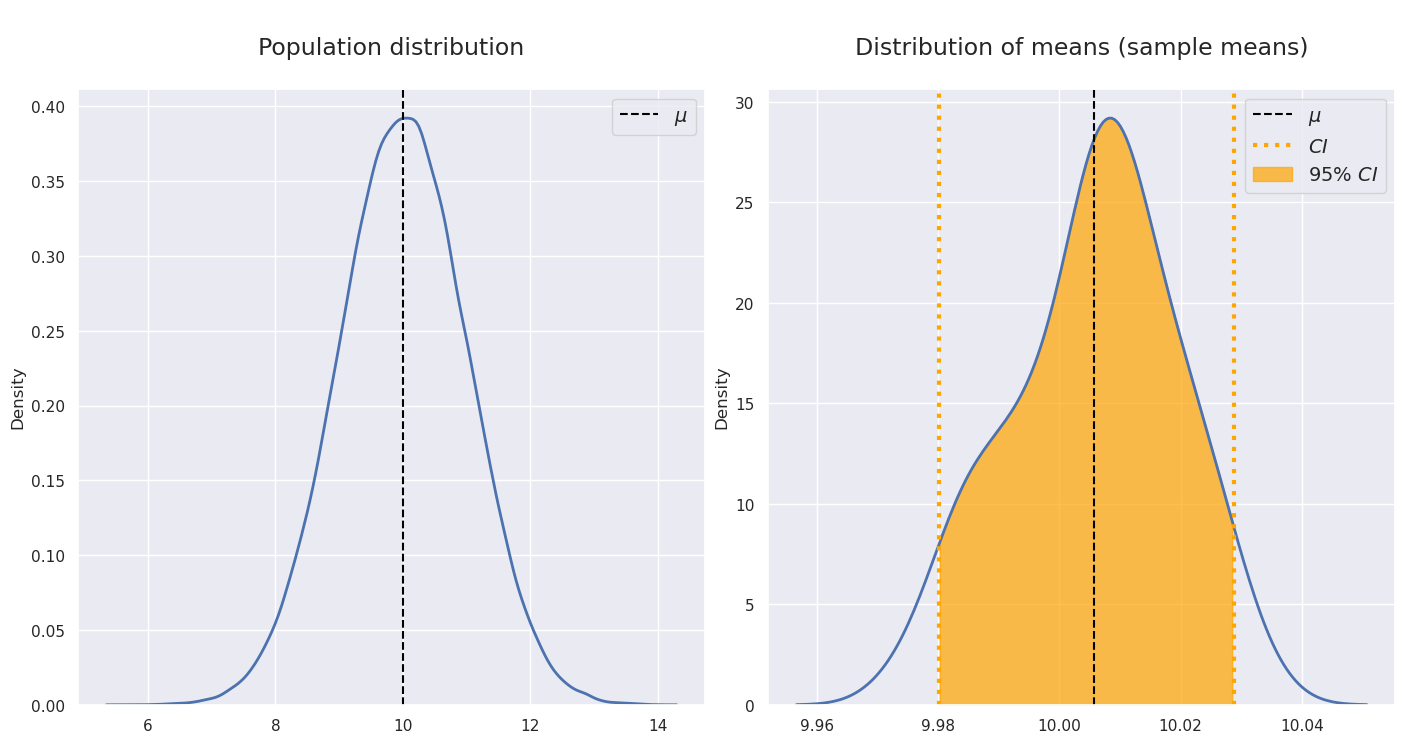

In [8]:
# The mean of the sample means is pretty much the same as the population mean but, in reality, we wouldn't know that
# Now lets see the population distribution and the distributions of the sample means

# Population plot
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(17, 8))

sns.kdeplot(norm_pop, linewidth=2, ax=ax_1)
ax_1.axvline(norm_pop.mean(), c="black", linestyle="--", label="$\mu$")
ax_1.set_title("\nPopulation distribution\n", fontdict={"size":17})
ax_1.legend(fontsize=14)

# Means plot
sns.kdeplot(means, linewidth=2, ax=ax_2)

# Mean and 95% of the data
ax_2.axvline(means.mean(), c="black", linestyle="--", label="$\mu$")
ax_2.axvline(P_025, c="orange", linestyle="dotted", linewidth=3, label="$CI$")
ax_2.axvline(P_975, c="orange", linestyle="dotted", linewidth=3)

X_fill, Y_fill = ax_2.get_lines()[0].get_data()
mask = (X_fill >= P_025) & (X_fill <= P_975)
ax_2.fill_between(X_fill[mask], Y_fill[mask], color="orange", alpha=0.7, label="$95\%\ CI$")

ax_2.set_title("\nDistribution of means (sample means)\n", fontdict={"size":17})
ax_2.legend(fontsize=14)

plt.subplots_adjust(wspace=0.1)
plt.show()

In [9]:
# Now let's bootstrapping for the basic and percentile method to ilustrate its power in non-normal data
# We are goint to create a Bootstrapping class just because, take your time to decode the python class below

class Bootstrapping:
    
    '''
    Bootstrapping resampling the sample
    
    This class does two types of bootsrapping based on the mean of the sample and return
    the low and upper confident intervals of the mean. The methods avaliable are basic
    bootstrapping, also known as Reverse Percentile Interval or Empirical bootstrapping.
    This function also computes the percentile boostrapping
    
    Parameters
    ----------
    
    data: array-like
        sample to be resampled
    
    tests: integer, int. Default 10,000
        integer indicating how many times the sample will be resample. Default 10,000
        
        
    Return
    ------
        tuple: tuple with the inferior limit and upper limit of the confidence interval
    
    
    Examples
    --------
    
    >>>from numpy.random import normal
    >>>sample = normal(0, 1, 1000)
    >>>boot = Bootstrapping(sample, tests=1000)
    >>>boot.basic()
    (-0.044194517957389545, 0.07898892888826403)
    
    '''
    
    def __init__(self, data:"array-like", tests:int=10000):
        
        self.data  = np.array(data).reshape(-1,)
        self.tests = tests
        
        self.mean = self.data.mean()
        self.std  = self.data.std()
    
    def __percentileLimits(self, means, lower, upper):
            return (np.percentile(means, lower), np.percentile(means, upper))
        
    def __bootstrap(self, sample):
            # Resampling the sample and computing the mean of the sample of the sample
            # This is basically bootstrapping
            means = []
            for _ in range(self.tests):
                mu = np.random.choice(self.data, self.data.shape[0], replace=True).mean()
                means.append(mu)
            
            return np.array(means).reshape(-1,)
        
    def basic(self, confidence=95):
        
        '''
        Get the confidence intervals based on the definition:

        CI = (low = 2X - x_{1 - a/2}, high = 2X - x_{a/2})
            where "X" is the sample/original mean, "x" is the mean found in the {1 - a/2} or 
            {a/2} percentile of the sample resampled and "a" means alpha, the value of the tail
            of the normal distribution
        
        '''
        
        means = self.__bootstrap(self.data)
        
        alpha = (100 - confidence) / 2
        lower_limit, upper_limit = self.__percentileLimits(means, alpha, 100 - alpha)
        
        return (2 * self.mean - upper_limit, 2 * self.mean - lower_limit)
    
    def percentile(self, confidence=95):
        
        '''
        Get the confidence intervals based on the definition:

        CI = (low = x_{a/2}, high = x_{1 - a/2})
            where x" is the mean found in the {1 - a/2} or {a/2} percentile of the
            sample resampled and "a" means alpha, the value of the tail of the normal
            distribution
        
        '''
        
        means = self.__bootstrap(self.data)
        alpha = (100 - confidence) / 2
        return self.__percentileLimits(means, alpha, 100 - alpha)

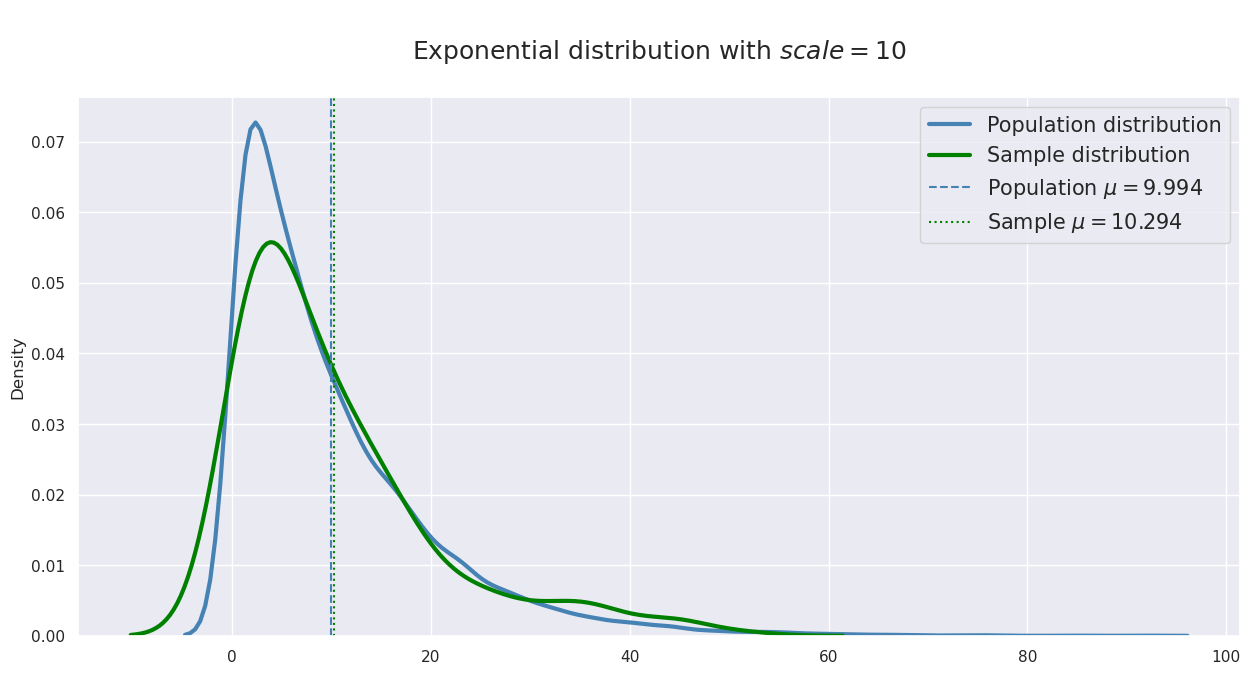

In [10]:
# Here is our non-normal data population and sample (no samples of the sample)

exp_pop = np.random.exponential(10, 10000)
exp_sam = np.random.choice(exp_pop ,250)

plt.figure(figsize=(15,7))
sns.kdeplot(exp_pop, label="Population distribution", linewidth=3,  c="steelblue")
sns.kdeplot(exp_sam, label="Sample distribution", linewidth=3,  c="green")

plt.axvline(exp_pop.mean(), linestyle="--", c="steelblue", label=f"Population $\mu={round(exp_pop.mean(),3)}$")
plt.axvline(exp_sam.mean(), linestyle="dotted", c="green", label=f"Sample $\mu={round(exp_sam.mean(),3)}$")

plt.title("\nExponential distribution with $scale = 10$\n", fontdict={"size":18})
plt.legend(fontsize=15)
plt.show()

In [11]:
# Now let's get the CI using our class and resampling 10000 times (default value of the class)
boots = Bootstrapping(exp_sam)

# Basic and percentile with confidence of 95%
Confidence = 95
low_b, high_b = boots.basic(confidence=Confidence)
low_p, high_p = boots.percentile(confidence=Confidence)

print(f"\nTrue population mean:{exp_pop.mean()}")
print("\nCI USING BASIC AND PERCENTILE BOOTSTRAPPING")
print("\nBasic bootstrapping:")
print(f"\tThe {Confidence}% confidence interval range from the value {low_b} to {high_b}")
print("\nPercentile bootstrapping:")
print(f"\tThe {Confidence}% confidence interval range from the value {low_p} to {high_p}")


True population mean:9.994224238569226

CI USING BASIC AND PERCENTILE BOOTSTRAPPING

Basic bootstrapping:
	The 95% confidence interval range from the value 8.9786843746052 to 11.516001746877752

Percentile bootstrapping:
	The 95% confidence interval range from the value 9.085676779440446 to 11.605977533555926


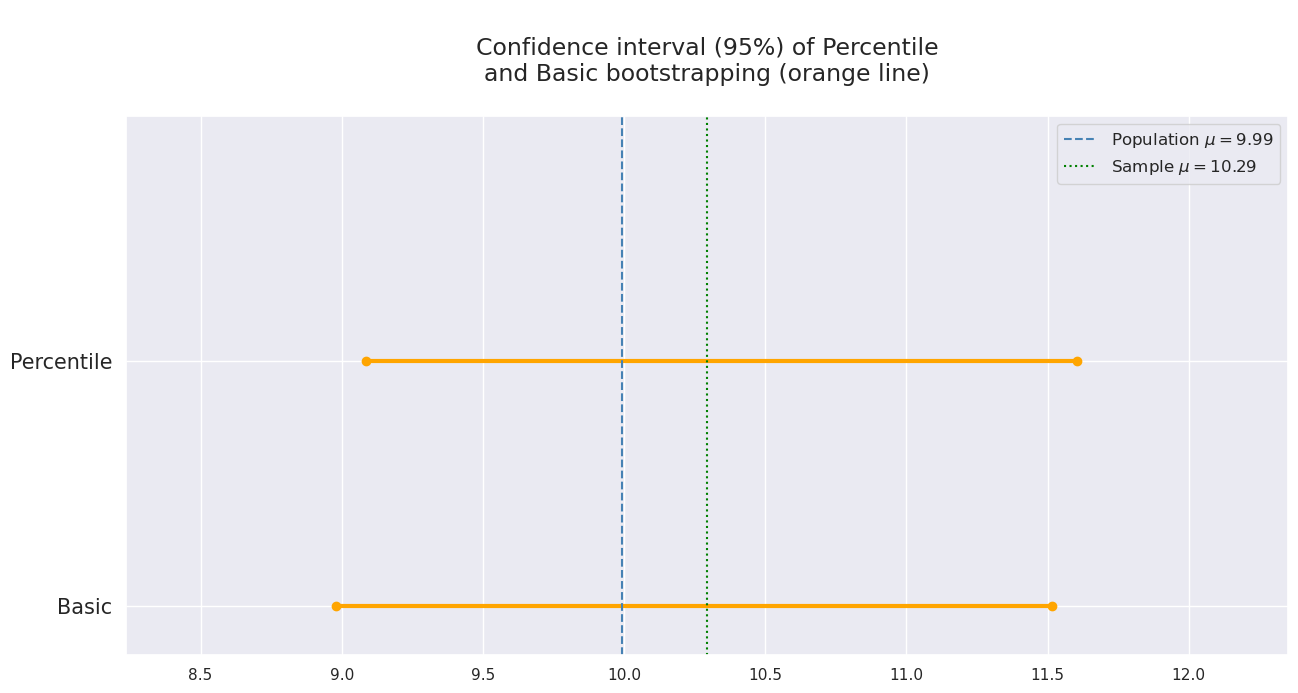

In [12]:
# Let's plot the results
data_dict = {}
data_dict['category'] = ['Basic','Percentile']
data_dict['lower'] = [low_b, low_p]
data_dict['upper'] = [high_b, high_p]
dataset = pd.DataFrame(data_dict)

plt.figure(figsize=(15,7))
y_axis = np.arange(0, dataset.shape[0] / 2, 0.5)
for lower, upper,y in zip(dataset['lower'], dataset['upper'], y_axis):
    plt.plot((lower,upper),(y,y),'o-', color="orange", linewidth=3)

plt.axvline(exp_pop.mean(), linestyle="--", c="steelblue", label=f"Population $\mu={round(exp_pop.mean(),2)}$")
plt.axvline(exp_sam.mean(), linestyle="dotted", c="green", label=f"Sample $\mu={round(exp_sam.mean(),2)}$")

plt.ylim(-0.1, 1)
plt.xlim( exp_sam.mean() - (exp_sam.mean() / 5), exp_sam.mean() + (exp_sam.mean() / 5) )
plt.yticks(y_axis, list(dataset['category']), fontsize=15)
plt.legend(fontsize=12)
plt.title("\nConfidence interval (95%) of Percentile\nand Basic bootstrapping (orange line)\n", fontdict={"size":17})
plt.show()

In [13]:
# We don't need to code our functions/classes to calcute the CI using bootstrap. scipy has already an implementation
# for basic, percentile and another one called bca (which is a litle bit more complicated to code)

boots_types = {"percentile":np.NaN, "basic":np.NaN, "bca":np.NaN}

for key in boots_types:
    b = stats.bootstrap((exp_sam,), np.mean, confidence_level=0.95, method=key)
    boots_types[key] = b.confidence_interval

boots_types

{'percentile': ConfidenceInterval(low=9.055867214920204, high=11.621822497043295),
 'basic': ConfidenceInterval(low=9.019238386128098, high=11.540396717781883),
 'bca': ConfidenceInterval(low=9.14037077147678, high=11.663961111138503)}

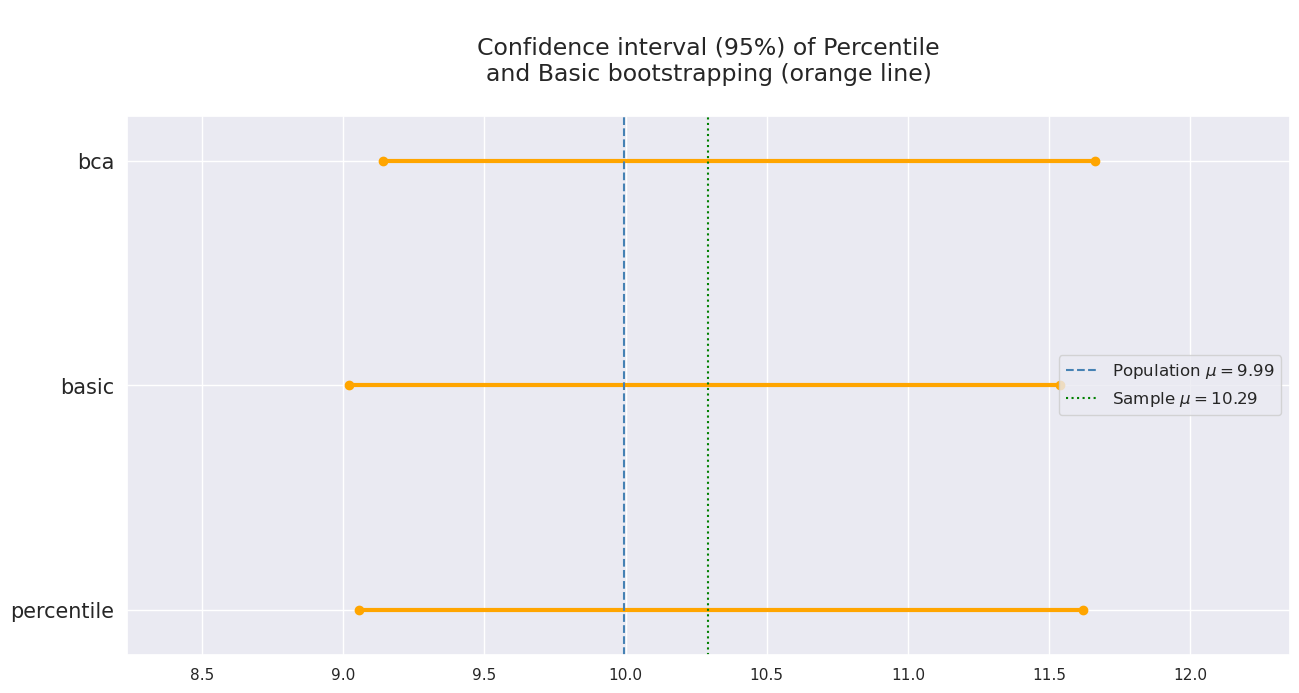

In [14]:
# Let's plot the results of scipy

b = boots_types
data_dict = {}
data_dict['category'] = ['percentile', 'basic', 'bca']
data_dict['lower'] = [b["percentile"].low, b["basic"].low, b["bca"].low]
data_dict['upper'] = [b["percentile"].high, b["basic"].high, b["bca"].high]
dataset = pd.DataFrame(data_dict)

plt.figure(figsize=(15,7))
y_axis = np.arange(0, dataset.shape[0] / 2, 0.5)
for lower, upper,y in zip(dataset['lower'], dataset['upper'], y_axis):
    plt.plot((lower,upper),(y,y),'o-', color="orange", linewidth=3)

plt.axvline(exp_pop.mean(), linestyle="--", c="steelblue", label=f"Population $\mu={round(exp_pop.mean(),2)}$")
plt.axvline(exp_sam.mean(), linestyle="dotted", c="green", label=f"Sample $\mu={round(exp_sam.mean(),2)}$")

plt.ylim(-0.1, 1.1)
plt.xlim( exp_sam.mean() - (exp_sam.mean() / 5), exp_sam.mean() + (exp_sam.mean() / 5) )
plt.yticks(y_axis, list(dataset['category']), fontsize=15)
plt.legend(loc="center right", fontsize=12)
plt.title("\nConfidence interval (95%) of Percentile\nand Basic bootstrapping (orange line)\n", fontdict={"size":17})
plt.show()

### P-value

A p-value is the probability of obtaining equal or rarer observations from your data point. This translates as the area under the curve of the tails of your data distribution (see above plots).

This p-value ($p$) is used to reject or not a null hypothesis. Any hypothesis that is not null is simply denoted as an alternative. To reject or not the null, an alpha ($\alpha$) value is chosen as a threshold to denote at what probability an observation can be considered extraordinary, this $\alpha$ value is usually chosen as 0.05, although in reality it tends to be an arbitrary value. Thus, depending on the error one is willing to accept, $\alpha$ can vary, for example, being stricter with values of 0.001 (accepting one error per 1000 observations) or 0.2 (one error per 5 cases). Thus, with a value of $p < \alpha$ the null hypothesis can be rejected and we would go for the alternative hypothesis, otherwise, with $p >  \alpha$, we would not have enough evidence to reject the null hypothesis.

On the other hand, how the heck are those hypotheses determined? Well, several definitions of what a null hypothesis is can be found such as "What is accepted by default", "Whatever is known or already defined", "What we do not want to test, or more formal "hypothesis that proposes that no statistical significance exists in a set of given observations", while the alternative is "What we are interested in knowing", but the reality is that they are somewhat ambiguous and personal criteria can certainly bias the determination of the hypothesis and end up choosing the wrong one (as may do, incluiding me). In fact, the choice of which hypothesis should be configured as the alternative or null is a much more complex process and will not be discussed in detail here. However, a more descriptive article about this can be found [somewhere else](https://towardsdatascience.com/hypothesis-testing-decoded-for-movers-and-shakers-bfc2bc34da41). The reality is that many statistical tests have already defined which is their null hypothesis and, therefore, which is the alternative.